# EXPLORATORY DATA ANALYSIS

In [1]:
%run "dataloader.ipynb"

C:\Users\mikyg\AppData\Local\Temp\ipykernel_6300\2962143429.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv('../data/train.csv', parse_dates=True, index_col="Date")


In [2]:
#importing the libraries
import numpy as np
import pandas as pd
from scipy import stats
import datetime 
import plotly.express as px
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")

In [3]:
import sys
import os
sys.path.insert(0, '../scripts/')
import logging
from logger_creator import log

In [4]:
print(f"Total shape: {train_df.shape}")
# set a logger file
logger = log(path="../logs/", file="exploratory_data_analysis_log.log")
logger.info("Starts EDA")

INFO Starts EDA


Total shape: (1017209, 8)


In [5]:
train_df.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1
2015-07-31,2,5,6064,625,1,1,0,1
2015-07-31,3,5,8314,821,1,1,0,1
2015-07-31,4,5,13995,1498,1,1,0,1
2015-07-31,5,5,4822,559,1,1,0,1


In [6]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [7]:
test_df.head()

,Id,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,
2015-09-17,1,1,4,1.0,1,0,0
2015-09-17,2,3,4,1.0,1,0,0
2015-09-17,3,7,4,1.0,1,0,0
2015-09-17,4,8,4,1.0,1,0,0
2015-09-17,5,9,4,1.0,1,0,0


In [11]:
# data extraction
train_df['Year'] = train_df.index.year
train_df['Month'] = train_df.index.month
train_df['Day'] = train_df.index.day
train_df['WeekOfYear'] = train_df.index.weekofyear
# adding new variable
train_df['SalePerCustomer'] = train_df['Sales']/train_df['Customers']
train_df['SalePerCustomer'].describe()

count    844340.000000
mean          9.493619
std           2.197494
min           0.000000
25%           7.895563
50%           9.250000
75%          10.899729
max          64.957854
Name: SalePerCustomer, dtype: float64

In [44]:
# data extraction
test_df['Year'] = test_df.index.year
test_df['Month'] = test_df.index.month
test_df['Day'] = test_df.index.day
test_df['WeekOfYear'] = test_df.index.weekofyear
# adding new variable
test_df.head()

,Id,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear
Date,,,,,,,,,,,
2015-09-17,1,1,4,1.0,1,0,0,2015,9,17,38
2015-09-17,2,3,4,1.0,1,0,0,2015,9,17,38
2015-09-17,3,7,4,1.0,1,0,0,2015,9,17,38
2015-09-17,4,8,4,1.0,1,0,0,2015,9,17,38
2015-09-17,5,9,4,1.0,1,0,0,2015,9,17,38


In [13]:
train_df.isnull().sum()

Store                   0
DayOfWeek               0
Sales                   0
Customers               0
Open                    0
Promo                   0
StateHoliday            0
SchoolHoliday           0
Year                    0
Month                   0
Day                     0
WeekOfYear              0
SalePerCustomer    172869
dtype: int64

In [14]:
test_df.isnull().sum()

Id                0
Store             0
DayOfWeek         0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
Year              0
Month             0
Day               0
WeekOfYear        0
dtype: int64

In [40]:
test_df['Open'].fillna(test_df['Open'].median(), inplace = True)

In [41]:
test_df.isnull().sum()

Id               0
Store            0
DayOfWeek        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
Year             0
Month            0
Day              0
WeekOfYear       0
dtype: int64

In [16]:
train_df[train_df['Sales']==0].shape

(172871, 13)

In [17]:
train_df = train_df[train_df['Sales']!=0]
train_df.shape

(844338, 13)

In [18]:
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [19]:
# check if there are any values with 1 promo 2 and missing Promo2 since cols
zz = store_df[store_df["Promo2"]==1]
yy = zz[zz['Promo2SinceWeek']=="NaN"].shape
print(yy)

(0, 10)


In [20]:
store_df[pd.isnull(store_df.CompetitionDistance)]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


In [21]:
store_df['CompetitionDistance'].describe()

count     1112.000000
mean      5404.901079
std       7663.174720
min         20.000000
25%        717.500000
50%       2325.000000
75%       6882.500000
max      75860.000000
Name: CompetitionDistance, dtype: float64

In [22]:
# since the mean is too high lets use the median to impute the missing value
store_df['CompetitionDistance'].fillna(store_df['CompetitionDistance'].median(), inplace = True)

In [23]:
# just like we saw above for the promo since columns the reason we have missing values are because
# they are drawn from other columns which are 0 so NaN's can be imputed to 0
# replace NA's by 0
store_df.fillna(0, inplace = True)

In [24]:
store_df.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [42]:
print("Joining train set with an additional store information.")

# by specifying inner join we make sure that only those observations 
# that are present in both train and store sets are merged together
train_store = pd.merge(train_df, store_df, how = 'inner', on = 'Store')

print("In total: ", train_store.shape)
train_store.head()

Joining train set with an additional store information.
In total:  (844338, 22)


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,...,SalePerCustomer,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,5263,555,1,1,0,1,2015,7,...,9.482883,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,5020,546,1,1,0,1,2015,7,...,9.194139,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,4782,523,1,1,0,1,2015,7,...,9.143403,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,5011,560,1,1,0,1,2015,7,...,8.948214,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,6102,612,1,1,0,1,2015,7,...,9.970588,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0


In [45]:
print("Joining train set with an additional store information.")

# by specifying inner join we make sure that only those observations 
# that are present in both train and store sets are merged together
test_store = pd.merge(test_df, store_df, how = 'inner', on = 'Store')

print("In total: ", test_store.shape)
test_store.head()

Joining train set with an additional store information.
In total:  (41088, 20)


,Id,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,1.0,1,0,0,2015,9,17,38,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,857,1,3,1.0,1,0,0,2015,9,16,38,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1713,1,2,1.0,1,0,0,2015,9,15,38,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,2569,1,1,1.0,1,0,0,2015,9,14,38,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,3425,1,7,0.0,0,0,0,2015,9,13,37,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0


In [26]:
train_store.groupby('StoreType')['Sales'].describe()

,count,mean,std,min,25%,50%,75%,max
StoreType,,,,,,,,
a,457042.0,6925.697986,3277.351589,46.0,4695.25,6285.0,8406.00,41551.0
b,15560.0,10233.380141,5155.729868,1252.0,6345.75,9130.0,13184.25,38722.0
c,112968.0,6933.126425,2896.958579,133.0,4916.00,6408.0,8349.25,31448.0
d,258768.0,6822.300064,2556.401455,538.0,5050.00,6395.0,8123.25,38037.0


In [27]:
train_store.groupby('StoreType')['Customers'].describe()

,count,mean,std,min,25%,50%,75%,max
StoreType,,,,,,,,
a,457042.0,795.422370,387.516543,8.0,547.0,720.0,949.0,7388.0
b,15560.0,2022.211825,910.687095,219.0,1255.0,1839.5,2751.0,5494.0
c,112968.0,815.538073,329.670020,18.0,583.0,756.0,981.0,3096.0
d,258768.0,606.353935,199.247092,64.0,464.0,577.0,716.0,2239.0


In [28]:
train_store.groupby('StoreType')['SalePerCustomer'].describe()

,count,mean,std,min,25%,50%,75%,max
StoreType,,,,,,,,
a,457042.0,8.846296,1.690913,3.635389,7.611945,8.631363,9.899438,29.877551
b,15560.0,5.133427,1.253988,2.749075,4.039561,4.987022,6.108760,9.203528
c,112968.0,8.626227,1.694325,3.382542,7.416985,8.424736,9.643063,64.957854
d,258768.0,11.277862,1.990706,4.881279,9.873309,11.194977,12.560328,57.614983


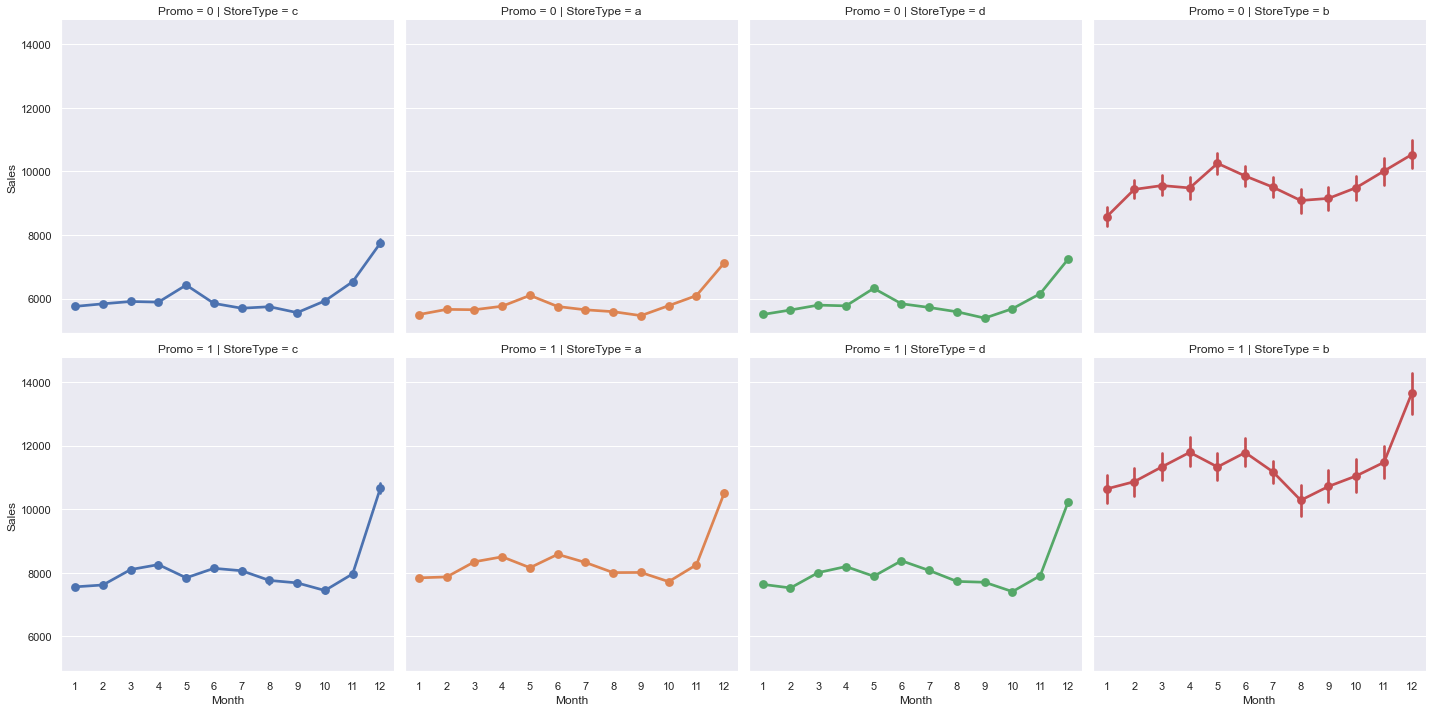

In [22]:
import seaborn as sns
# sales trends
sns.factorplot(data = train_store, x = 'Month', y = "Sales", 
               col = 'StoreType', # per store type in cols
               hue = 'StoreType',
               row = 'Promo') 

In [23]:
train_df['Year'].value_counts()

2013    337924
2014    310385
2015    196029
Name: Year, dtype: int64

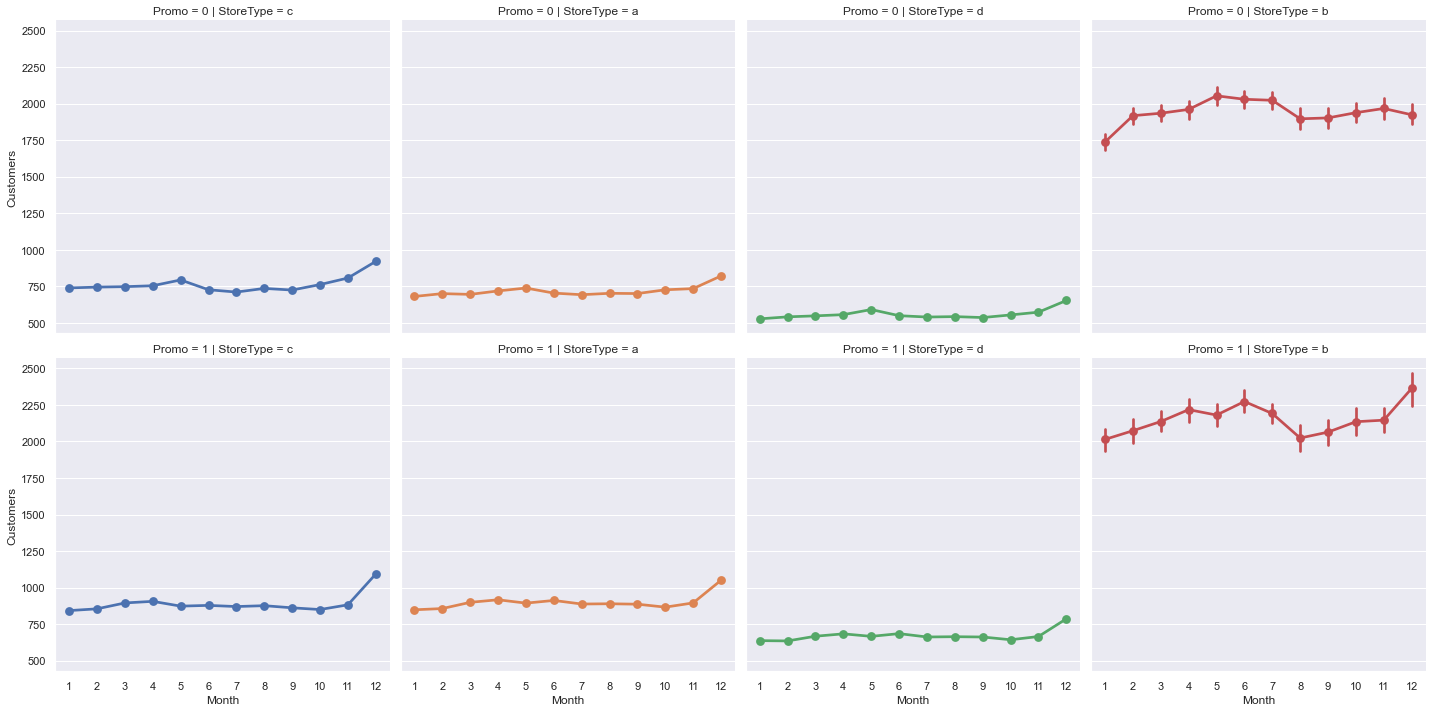

In [24]:
sns.factorplot(data = train_store, x = 'Month', y = "Customers", 
               col = 'StoreType', # per store type in cols
               hue = 'StoreType',
               row = 'Promo')

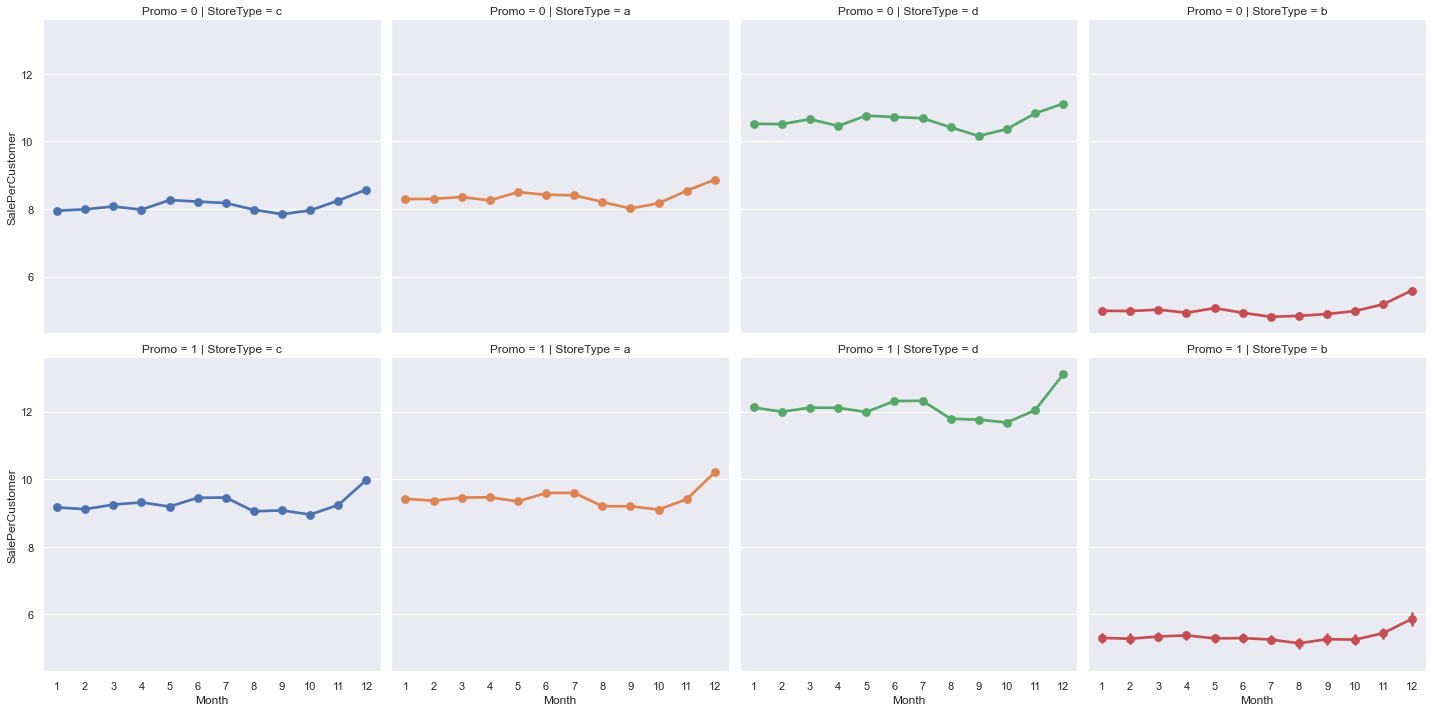

In [25]:
# customers
sns.factorplot(data = train_store, x = 'Month', y = "SalePerCustomer", 
               col = 'StoreType', # per store type in cols
               hue = 'StoreType',
               row = 'Promo', # per store type in rows
) 

In [26]:
# find how much unique stores are within the store types
train_store['StoreType'].value_counts()

a    457042
d    258768
c    112968
b     15560
Name: StoreType, dtype: int64

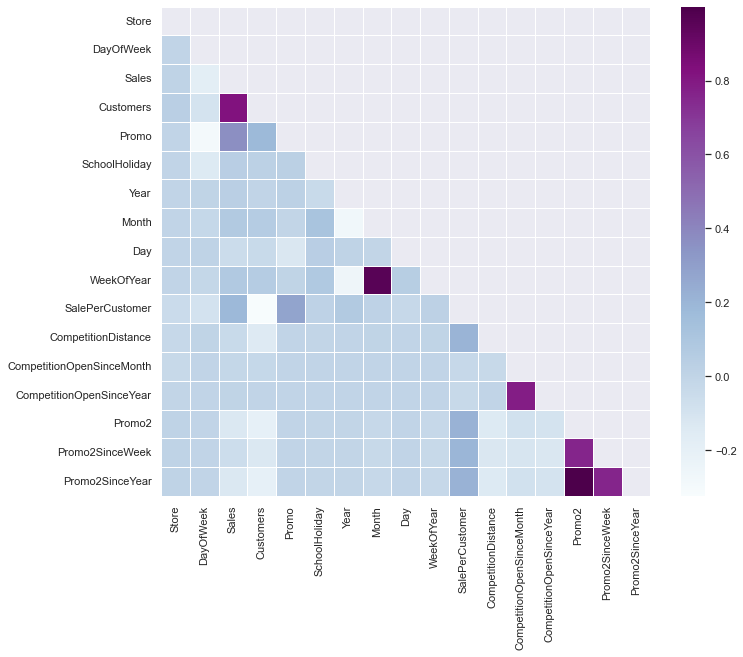

In [27]:
# Compute the correlation matrix 
# exclude 'Open' variable
corr_all = train_store.drop('Open', axis = 1).corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr_all, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize = (11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_all, mask = mask,
            square = True, linewidths = .5, ax = ax, cmap = "BuPu")      
plt.show()

In [28]:
train_store.to_csv('../data/train_store.csv')

# Major findings for the exploaratory data analysis phase

Check for distribution in both training and test sets - are the promotions distributed similarly between these two groups?

In [29]:
from data_exploration import exploration

KeyboardInterrupt: 

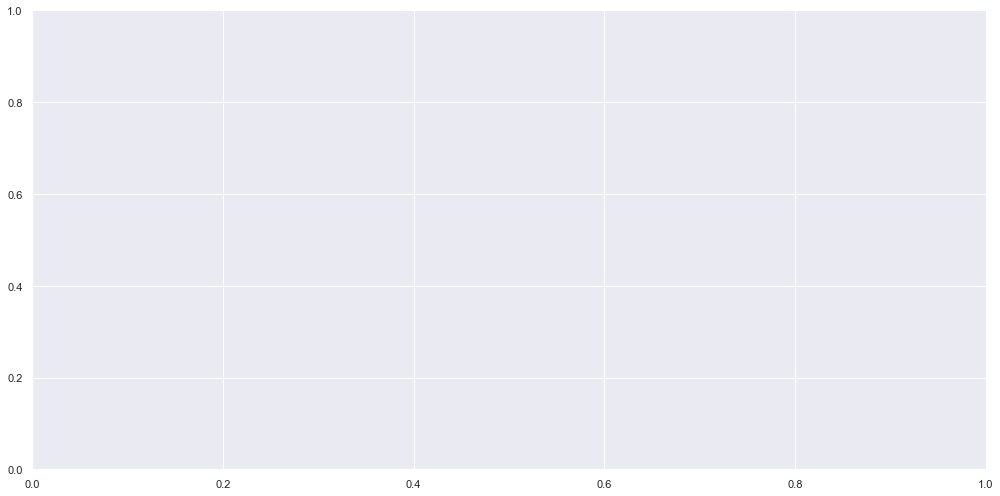

In [30]:
exploration.plot_hist(train_df, 'Promo', 'red')

KeyboardInterrupt: 

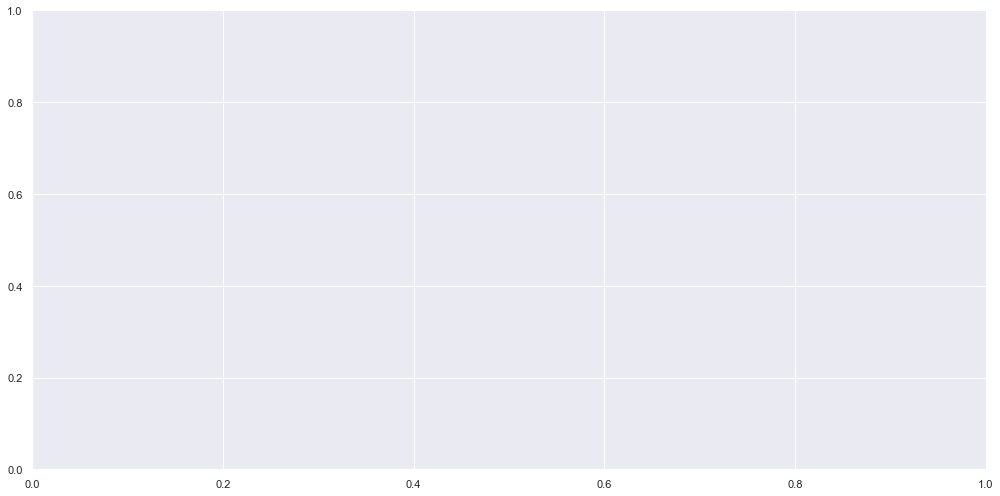

In [46]:
exploration.plot_hist(test_df, 'Promo', 'green')

In [32]:
train_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,Year,Month,Day,WeekOfYear,SalePerCustomer
count,844338.000000,844338.000000,844338.000000,844338.000000,844338.0,844338.000000,844338.000000,844338.000000,844338.000000,844338.000000,844338.000000,844338.000000
mean,558.421374,3.520350,6955.959134,762.777166,1.0,0.446356,0.193578,2013.831945,5.845774,15.835706,23.646946,9.493641
std,321.730861,1.723712,3103.815515,401.194153,0.0,0.497114,0.395102,0.777271,3.323959,8.683392,14.389931,2.197448
min,1.000000,1.000000,46.000000,8.000000,1.0,0.000000,0.000000,2013.000000,1.000000,1.000000,1.000000,2.749075
25%,280.000000,2.000000,4859.000000,519.000000,1.0,0.000000,0.000000,2013.000000,3.000000,8.000000,11.000000,7.895571
50%,558.000000,3.000000,6369.000000,676.000000,1.0,0.000000,0.000000,2014.000000,6.000000,16.000000,23.000000,9.250000
75%,837.000000,5.000000,8360.000000,893.000000,1.0,1.000000,0.000000,2014.000000,8.000000,23.000000,35.000000,10.899729
max,1115.000000,7.000000,41551.000000,7388.000000,1.0,1.000000,1.000000,2015.000000,12.000000,31.000000,52.000000,64.957854


In [30]:
test_df.describe()

,Id,Store,DayOfWeek,Open,Promo,SchoolHoliday,Year,Month,Day,WeekOfYear
count,41088.000000,41088.000000,41088.000000,41077.000000,41088.000000,41088.000000,41088.0,41088.000000,41088.000000,41088.000000
mean,20544.500000,555.899533,3.979167,0.854322,0.395833,0.443487,2015.0,8.354167,13.520833,34.645833
std,11861.228267,320.274496,2.015481,0.352787,0.489035,0.496802,0.0,0.478266,8.448450,2.015481
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2015.0,8.000000,1.000000,31.000000
25%,10272.750000,279.750000,2.000000,1.000000,0.000000,0.000000,2015.0,8.000000,6.750000,33.000000
50%,20544.500000,553.500000,4.000000,1.000000,0.000000,0.000000,2015.0,8.000000,12.500000,35.000000
75%,30816.250000,832.250000,6.000000,1.000000,1.000000,1.000000,2015.0,9.000000,19.250000,36.000000
max,41088.000000,1115.000000,7.000000,1.000000,1.000000,1.000000,2015.0,9.000000,31.000000,38.000000


In [31]:
# promo and sales 
sales_promo = train_df.groupby('Promo')["Sales"].sum()

In [32]:
promo_sale= pd.DataFrame({'Promo':sales_promo.index, 'sales_sum':sales_promo.values})
promo_sale.head()

,Promo,sales_sum
0,0,2771974337
1,1,3101206286


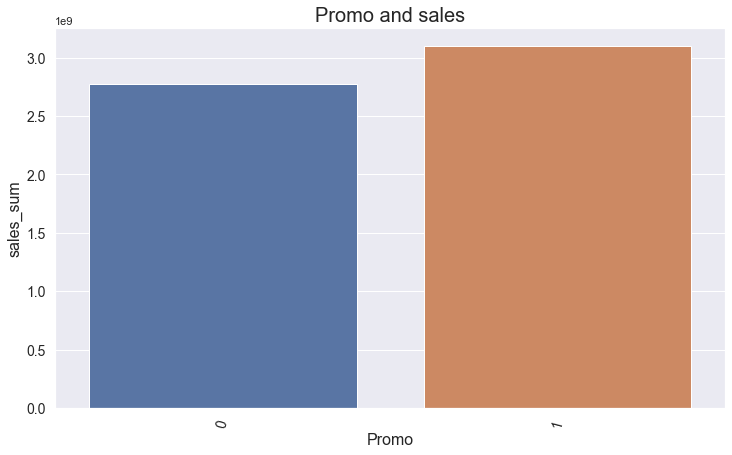

In [33]:
exploration.plot_bar(promo_sale, 'Promo', 'sales_sum', 'Promo and sales', 'Promo', 'sales_sum')

In [35]:
customers_promo = train_df.groupby('Promo')["Customers"].sum()

In [36]:
promo_customers= pd.DataFrame({'Promo':customers_promo.index, 'Customers':customers_promo.values})
promo_customers.head()

,Promo,Customers
0,0,325777807
1,1,318263940


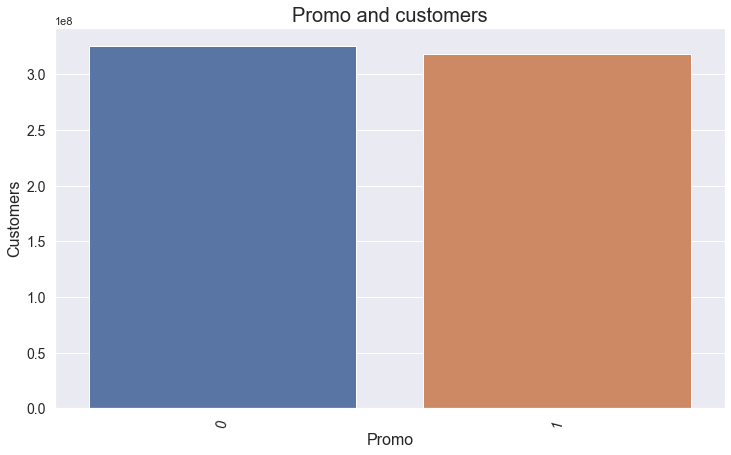

In [37]:
exploration.plot_bar(promo_customers, 'Promo', 'Customers', 'Promo and customers', 'Promo', 'Customers')

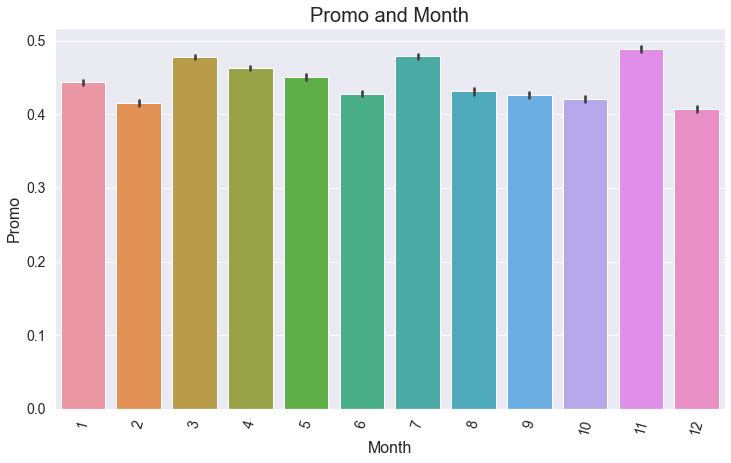

In [38]:
exploration.plot_bar(train_store, 'Month', 'Promo', 'Promo and Month', 'Month', 'Promo')

In [ ]:
exploration.plot_bar(test_store, 'Month', 'Promo', 'Promo and Month', 'Month', 'Promo')

Check & compare sales behavior before, during and after holidays

In [48]:
state_holiday_list = train_df['StateHoliday'].values.tolist()
def modify_holiday_list(holiday_list:list) -> list:
    new_index = ["neither"] * len(holiday_list)
    for index , value in enumerate(holiday_list):
        if value == 'a': #public holiday
            affect_list(new_index, 3, 1, index)
        elif value == 'b': #Easter
            affect_list(new_index, 10, 50, index)
        elif value == 'c': # christmas
            affect_list(new_index, 5, 12, index)
        else:
            pass

    return new_index

In [49]:
# get state holiday list
# 10 days for Easter
# 3 days for public holiday
# Considering christmas lasts for 12 days, Easter for 50 days and public holidays for 1 day.
#a = public holiday, b = Easter holiday, c = Christmas, 0 = None
def affect_list(change_list, interval, duration, index):
    start_pt = int(index-duration/2) - interval
    try:
        for index in range(start_pt, start_pt + interval):
            change_list[index] = 'before'
        for index in range(start_pt + interval, start_pt + interval + duration):
            change_list[index] = 'during'
        for index in range(start_pt + interval + duration, start_pt + interval + duration + interval):
            change_list[index] = 'after'
    except:
        pass

    return change_list

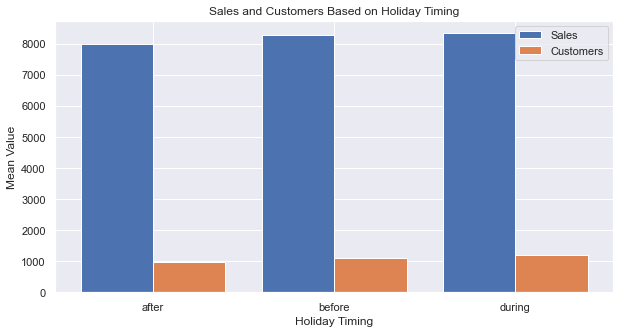

In [52]:
sales_timing_list = modify_holiday_list(state_holiday_list)
timing_added_df = train_df.loc[:,['Sales','Customers']]
timing_added_df['HolidayTiming'] = sales_timing_list
grouped_timing = timing_added_df.groupby('HolidayTiming').agg(
    {'Sales': 'mean', 'Customers': 'mean'})
grouped_timing = grouped_timing.iloc[:3, :]

plt.figure(figsize=(10,5))
X_axis = np.arange(len(grouped_timing.index))
plt.bar(X_axis - 0.2, grouped_timing['Sales'], 0.4, label='Sales')
plt.bar(X_axis + 0.2, grouped_timing['Customers'], 0.4, label='Customers')

plt.xticks(X_axis, grouped_timing.index)
plt.xlabel("Holiday Timing")
plt.ylabel("Mean Value")
plt.title("Sales and Customers Based on Holiday Timing")
plt.legend()

Find out any seasonal (Christmas, Easter etc) purchase behaviours,

In [59]:
test_df.head()

,Id,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear
Date,,,,,,,,,,,
2015-09-17,1,1,4,1.0,1,0,0,2015,9,17,38
2015-09-17,2,3,4,1.0,1,0,0,2015,9,17,38
2015-09-17,3,7,4,1.0,1,0,0,2015,9,17,38
2015-09-17,4,8,4,1.0,1,0,0,2015,9,17,38
2015-09-17,5,9,4,1.0,1,0,0,2015,9,17,38


In [61]:
average_sales = train_df.groupby('StateHoliday')["Sales"].mean()

[Text(0, 0, '0'),
 Text(1, 0, '0'),
 Text(2, 0, 'a'),
 Text(3, 0, 'b'),
 Text(4, 0, 'c')]

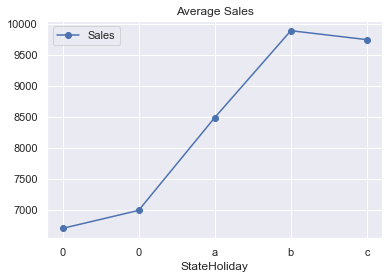

In [62]:
ax1 = average_sales.plot(legend=True,marker='o',title="Average Sales")
ax1.set_xticks(range(len(average_sales)))
ax1.set_xticklabels(average_sales.index.tolist())

In [63]:
# aggregated df from sales mean and custmers mean
seasonal = train_df.groupby('StateHoliday').agg({'Sales':'mean', 'Customers':'mean'})
seasonal = seasonal.iloc[2:,:]
seasonal.head()

,Sales,Customers
StateHoliday,,
a,8487.471182,1279.172911
b,9887.889655,1686.889655
c,9743.746479,1569.225352
